In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools



In [9]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
cm = 1/2.54
data_path = './sfGFP-mCherry.xlsx'
key_path = 'GFP_mCherry_screen_reactions.csv'

In [7]:
data = pd.read_excel(data_path)
data

,Fluorophore,Time,A1,A2,A3,B1,B2,B3,C1,C2,...,M3,N1,N2,N3,O1,O2,O3,P1,P2,P3
0,GFP,00:00:00,1227,1401,1318,1224,1283,1286,1253,1271,...,1290,1298,1192,1290,1307,1209,1227,1261,1181,1204
1,GFP,00:10:00,1165,1331,1260,1162,1281,1177,1210,1301,...,1379,1316,1181,1246,1270,1105,1153,1267,1127,1158
2,GFP,00:20:00,1131,1343,1211,1179,1289,1152,1146,1363,...,1389,1375,1133,1288,1259,1093,1156,1204,1071,1181
3,GFP,00:30:00,1174,1335,1176,1132,1292,1161,1153,1374,...,1396,1364,1093,1257,1308,1065,1134,1184,1084,1148
4,GFP,00:40:00,1139,1327,1168,1154,1305,1130,1139,1389,...,1406,1365,1094,1261,1252,1086,1122,1184,1097,1097
5,mCherry,00:00:23,13,21,14,12,20,12,1,1,...,6,5,20,12,12,19,5,5,6,16
6,mCherry,00:10:23,5,8,3,14,8,0,13,12,...,5,12,7,3,8,15,5,12,0,0
7,mCherry,00:20:23,16,0,8,7,3,1,10,13,...,15,5,5,1,8,6,0,24,17,8
8,mCherry,00:30:23,0,7,7,6,15,0,3,9,...,17,8,1,11,11,2,21,6,8,19
9,mCherry,00:40:23,2,13,11,9,10,14,6,5,...,11,14,3,10,15,7,10,1,5,13


In [8]:
pivoted_data = data.melt(id_vars=['Fluorophore', 'Time'], var_name='Well', value_name='Fluorescent Value')
pivoted_data

,Fluorophore,Time,Well,Fluorescent Value
0,GFP,00:00:00,A1,1227
1,GFP,00:10:00,A1,1165
2,GFP,00:20:00,A1,1131
3,GFP,00:30:00,A1,1174
4,GFP,00:40:00,A1,1139
...,...,...,...,...
475,mCherry,00:00:23,P3,16
476,mCherry,00:10:23,P3,0
477,mCherry,00:20:23,P3,8
478,mCherry,00:30:23,P3,19


In [38]:
key = pd.read_csv(key_path)
key = key.reset_index().rename(columns={'index': 'well_number'})
key

,well_number,replicate_id,unique_id,WCE,GFP,mCherry,Water
0,0,0,0,40.0,0.0,0.0,10.0
1,1,1,1,40.0,0.0,1.0,9.0
2,2,2,2,40.0,0.0,2.0,8.0
3,3,4,4,40.0,0.0,4.0,6.0
4,4,6,6,40.0,1.0,0.0,9.0
5,5,7,7,40.0,1.0,1.0,8.0
6,6,8,8,40.0,1.0,2.0,7.0
7,7,10,10,40.0,1.0,4.0,5.0
8,8,12,12,40.0,2.0,0.0,8.0
9,9,13,13,40.0,2.0,1.0,7.0


In [45]:
cells = {}
rows = 16
columns = 24
available_rows = range(rows)
available_cols = range(columns)

wells = list(itertools.product(*[available_cols,available_rows]))
wells_df = pd.DataFrame(wells,columns=['column','row'])
wells_df['well_number'] = [i for i in range(len(wells_df))]
wells_df

def convert_row(row_number):
    return chr(row_number + 65)
names = wells_df.copy()
names['row_name'] = names['row'].apply(convert_row)
names['col_name'] = names['column'] + 1
names['Well'] = names['row_name'] + names['col_name'].astype(str)
names = names.drop(columns=['column','row','col_name','row_name'])
names
wells_df = wells_df.merge(names, on='well_number')
wells_df

,column,row,well_number,Well
0,0,0,0,A1
1,0,1,1,B1
2,0,2,2,C1
3,0,3,3,D1
4,0,4,4,E1
...,...,...,...,...
379,23,11,379,L24
380,23,12,380,M24
381,23,13,381,N24
382,23,14,382,O24


In [46]:
def snake_df(df):
        sorted_array = []
        for col, col_df in df.groupby('column'):
            if col % 2 == 0:
                col_df = col_df.sort_values('row',ascending=True)
            else:
                col_df = col_df.sort_values('row',ascending=False)
            sorted_array.append(col_df)
        
        return pd.concat(sorted_array)

sorted_df = snake_df(wells_df)
sorted_df
comp_key = key.merge(sorted_df, on='well_number')
comp_key

,well_number,replicate_id,unique_id,WCE,GFP,mCherry,Water,column,row,Well
0,0,0,0,40.0,0.0,0.0,10.0,0,0,A1
1,1,1,1,40.0,0.0,1.0,9.0,0,1,B1
2,2,2,2,40.0,0.0,2.0,8.0,0,2,C1
3,3,4,4,40.0,0.0,4.0,6.0,0,3,D1
4,4,6,6,40.0,1.0,0.0,9.0,0,4,E1
5,5,7,7,40.0,1.0,1.0,8.0,0,5,F1
6,6,8,8,40.0,1.0,2.0,7.0,0,6,G1
7,7,10,10,40.0,1.0,4.0,5.0,0,7,H1
8,8,12,12,40.0,2.0,0.0,8.0,0,8,I1
9,9,13,13,40.0,2.0,1.0,7.0,0,9,J1


In [59]:
data_key = pivoted_data.merge(comp_key, on='Well')
data_key

,Fluorophore,Time,Well,Fluorescent Value,well_number,replicate_id,unique_id,WCE,GFP,mCherry,Water,column,row
0,GFP,00:00:00,A1,1227,0,0,0,40.0,0.0,0.0,10.0,0,0
1,GFP,00:10:00,A1,1165,0,0,0,40.0,0.0,0.0,10.0,0,0
2,GFP,00:20:00,A1,1131,0,0,0,40.0,0.0,0.0,10.0,0,0
3,GFP,00:30:00,A1,1174,0,0,0,40.0,0.0,0.0,10.0,0,0
4,GFP,00:40:00,A1,1139,0,0,0,40.0,0.0,0.0,10.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,mCherry,00:00:23,P3,16,47,28,100,40.0,4.0,4.0,2.0,2,15
476,mCherry,00:10:23,P3,0,47,28,100,40.0,4.0,4.0,2.0,2,15
477,mCherry,00:20:23,P3,8,47,28,100,40.0,4.0,4.0,2.0,2,15
478,mCherry,00:30:23,P3,19,47,28,100,40.0,4.0,4.0,2.0,2,15


In [60]:
end_point = data_key['Time'].iloc[4]
end_data = data_key[data_key['Time'] >= end_point]
end_data

,Fluorophore,Time,Well,Fluorescent Value,well_number,replicate_id,unique_id,WCE,GFP,mCherry,Water,column,row
4,GFP,00:40:00,A1,1139,0,0,0,40.0,0.0,0.0,10.0,0,0
9,mCherry,00:40:23,A1,2,0,0,0,40.0,0.0,0.0,10.0,0,0
14,GFP,00:40:00,A2,1327,16,0,36,40.0,0.0,0.0,10.0,1,0
19,mCherry,00:40:23,A2,13,16,0,36,40.0,0.0,0.0,10.0,1,0
24,GFP,00:40:00,A3,1168,32,0,72,40.0,0.0,0.0,10.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,mCherry,00:40:23,P1,1,15,28,28,40.0,4.0,4.0,2.0,0,15
464,GFP,00:40:00,P2,1097,31,28,64,40.0,4.0,4.0,2.0,1,15
469,mCherry,00:40:23,P2,5,31,28,64,40.0,4.0,4.0,2.0,1,15
474,GFP,00:40:00,P3,1097,47,28,100,40.0,4.0,4.0,2.0,2,15


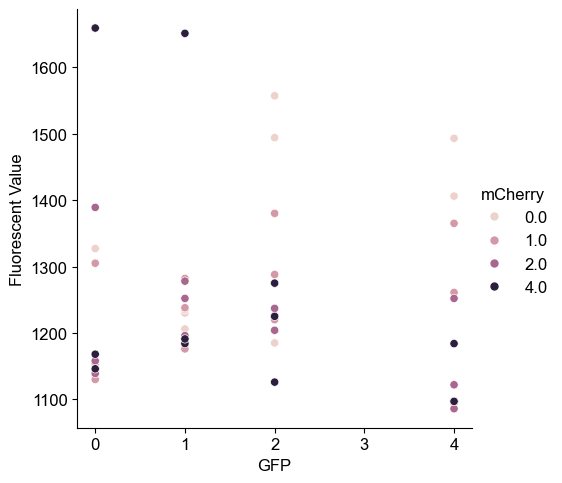

In [65]:
sns.relplot(data=end_data[end_data['Fluorophore'] == 'GFP'], x='GFP', y='Fluorescent Value', hue='mCherry', kind='scatter')